# Cleaning and pre-processing

### Importing the libraries and data

In [5]:
import csv
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [6]:
# import data
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

In [7]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [8]:
#Check for NA in the data set and count them
listings.isna().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [9]:
## find columns that only contain (1) unique element  and DROP Them as they dont add any value to the Model 
for col in listings.columns:
    if len(listings[col].unique()) == 1:
        listings = listings.drop(col,axis=1)
    


In [10]:
listings.head()

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,thumbnail_url,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,NaN,...,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,...,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,...,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,NaN,...,10.0,10.0,9.0,9.0,f,strict,f,f,1,0.89


In [18]:
#Check the Dependent Variable Content
listings['host_is_superhost'].value_counts()

#Since the O/P is T and F , I am planning to convert it to 0 and 1 respectively 

f    3038
t     778
Name: host_is_superhost, dtype: int64

In [19]:
#Replace the value to 0 where ever there is F and 1 where ever there is T 
listings.host_is_superhost = listings['host_is_superhost'].replace({'f': 0, 't': 1})

In [20]:
#Check the counts after the replacement 

listings['host_is_superhost'].value_counts()

0.0    3038
1.0     778
Name: host_is_superhost, dtype: int64

In [23]:
feature_boolean_fields=['host_is_superhost']
def process_boolean_fields(listings,columns):
    """
    INPUT
        columns - a string of one of the values from the host_is_superhost column
    
    OUTPUT
        return 1 if the string is  ('t'")
        return 0 otherwise or('f')
    
    """
    for col in columns:
        listings.loc[(listings[col] == 't'),col]=1
        listings.loc[(listings[col] == 'f'),col]=0
        
    return listings


listings=process_boolean_fields(listings,feature_boolean_fields)

/Users/sandeepdiddi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [24]:
listings['host_is_superhost']=listings['host_is_superhost'].astype('float64')

In [25]:
listings['host_is_superhost'].value_counts()

0.0    3038
1.0     778
Name: host_is_superhost, dtype: int64

In [26]:
host_list=listings[['id','host_id','host_response_rate','host_is_superhost','neighbourhood_group_cleansed',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'guests_included', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location',
       'review_scores_value']]

In [27]:
host_list.head()

,id,host_id,host_response_rate,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,...,price,guests_included,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,241032,956883,96%,0.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,$85.00,2,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,953595,5177328,98%,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,$150.00,1,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,3308979,16708587,67%,0.0,Queen Anne,House,Entire home/apt,11,4.5,5.0,...,$975.00,10,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,7421966,9851441,NaN,0.0,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,...,$100.00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,278830,1452570,100%,0.0,Queen Anne,House,Entire home/apt,6,2.0,3.0,...,$450.00,6,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0


In [30]:
host_list.head()


,id,host_id,host_response_rate,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,...,price,guests_included,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,241032,956883,96%,0.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,$85.00,2,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,953595,5177328,98%,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,$150.00,1,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,3308979,16708587,67%,0.0,Queen Anne,House,Entire home/apt,11,4.5,5.0,...,$975.00,10,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,7421966,9851441,NaN,0.0,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,...,$100.00,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,278830,1452570,100%,0.0,Queen Anne,House,Entire home/apt,6,2.0,3.0,...,$450.00,6,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0


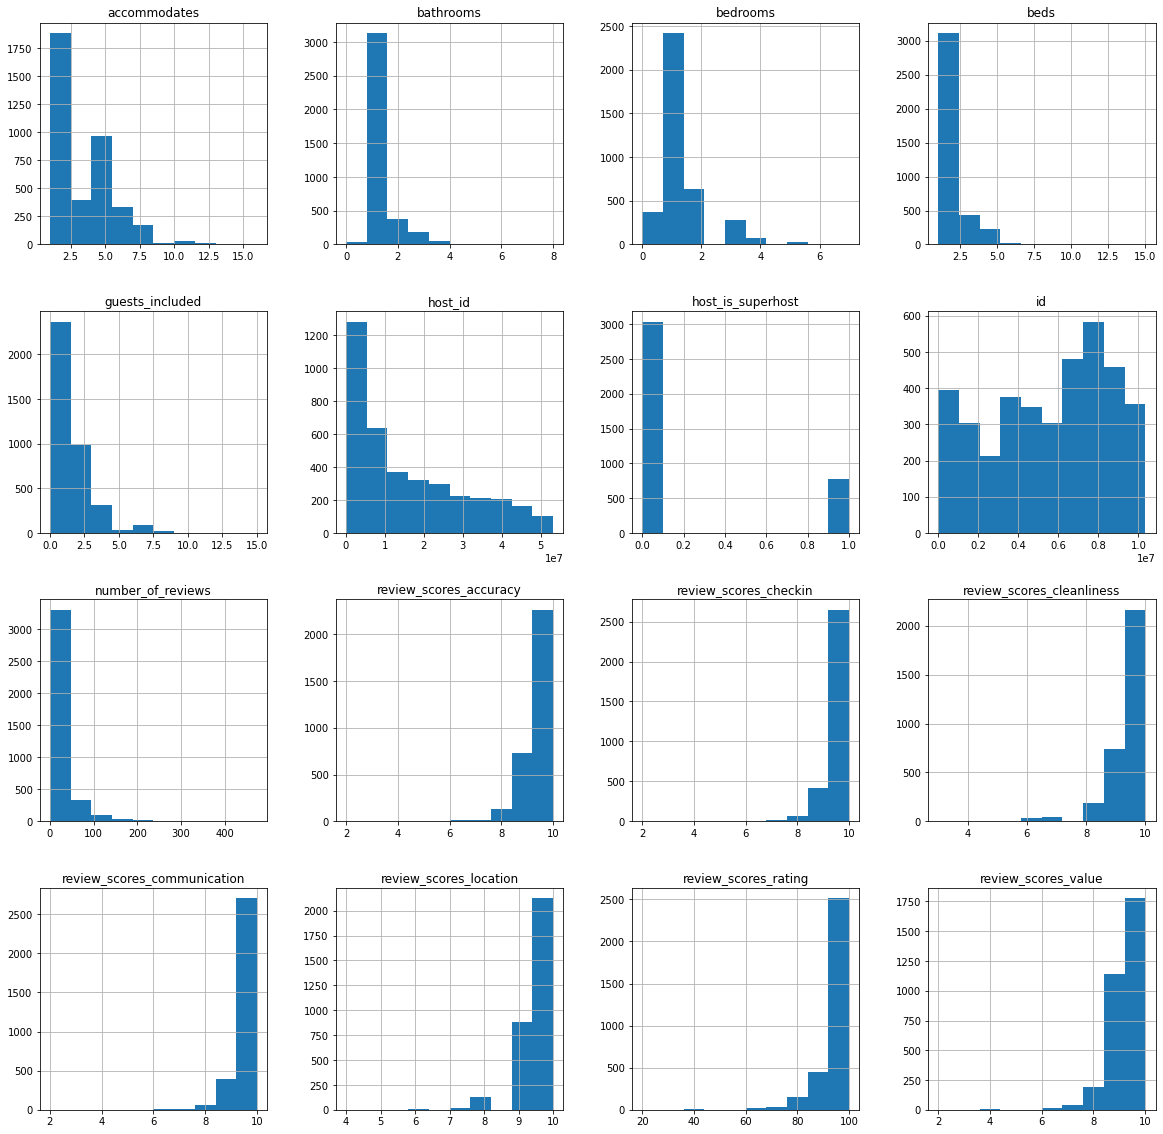

In [32]:
#Plot the histogram 
import matplotlib as plt 
%matplotlib inline
# Plotting the distribution of numerical and boolean categories
host_list.hist(figsize=(20,20));

#As seen in the Histogramt below 

#Most of the data points are Skewed, some inference are below 

#1 : Most house has accomadations are between 1-2.5 Bedrooms 
#2 : Most houses have 1 Bathroom 
#3 : Most houses Are very clean as per the reviews provided by the customers 

In [33]:
#Check for NULL values and count them 

host_list.isnull().sum()

id                                0
host_id                           0
host_response_rate              523
host_is_superhost                 2
neighbourhood_group_cleansed      0
property_type                     1
room_type                         0
accommodates                      0
bathrooms                        16
bedrooms                          6
beds                              1
price                             0
guests_included                   0
number_of_reviews                 0
review_scores_rating            647
review_scores_accuracy          658
review_scores_cleanliness       653
review_scores_checkin           658
review_scores_communication     651
review_scores_location          655
review_scores_value             656
dtype: int64

In [35]:
# populate Review Nan with the average 
median_imputer = SimpleImputer(strategy='median')
host_list.loc[:,['review_scores_value','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location']] = median_imputer.fit_transform(host_list.loc[:,['review_scores_value','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location']])


/Users/sandeepdiddi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [36]:
host_list.isnull().sum()

id                                0
host_id                           0
host_response_rate              523
host_is_superhost                 2
neighbourhood_group_cleansed      0
property_type                     1
room_type                         0
accommodates                      0
bathrooms                        16
bedrooms                          6
beds                              1
price                             0
guests_included                   0
number_of_reviews                 0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
dtype: int64

In [37]:
host_list.head()

,id,host_id,host_response_rate,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,...,price,guests_included,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,241032,956883,96%,0.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,$85.00,2,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,953595,5177328,98%,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,$150.00,1,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,3308979,16708587,67%,0.0,Queen Anne,House,Entire home/apt,11,4.5,5.0,...,$975.00,10,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,7421966,9851441,NaN,0.0,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,...,$100.00,1,0,96.0,10.0,10.0,10.0,10.0,10.0,10.0
4,278830,1452570,100%,0.0,Queen Anne,House,Entire home/apt,6,2.0,3.0,...,$450.00,6,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0


## Data Dictonary

* experiences_offered - slightly unclear as it does not appear to directly relate to Airbnb Experiences, but this seems to be the main recommended category of travel type, e.g. business
* host_since - date that the host first joined Airbnb
* host_response_time - average amount of time the host takes to reply to messages
* host_response_rate - proportion of messages that the host replies to
* host_is_superhost - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb
* host_listings_count - how many listings the host has in total
* host_identity_verified - whether or not the host has been verified with id
* neighbourhood_cleansed - the London borough the property is in
* property_type - type of property, e.g. house or flat
* room_type - type of listing, e.g. entire home, private room or shared room
* accommodates - how many people the property accommodates
* bathrooms - number of bathrooms
* bedrooms - number of bedrooms
* beds - number of beds
* bed_type - type of bed, e.g. real bed or sofa-bed
* amenities - list of amenities
* price - nightly advertised price (the target variable)
* security_deposit - the amount required as a security deposit
* cleaning_fee - the amount of the cleaning fee (a fixed amount paid per booking)
* guests_included - the number of guests included in the booking fee
* extra_people - the price per additional guest above the guests_included price
* minimum_nights - the minimum length of stay
* maximum_nights - the maximum length of stay
* calendar_updated - when the host last updated the calendar
* availability_30 - how many nights are available to be booked in the next 30 days
* availability_60 - how many nights are available to be booked in the next 60 days
* availability_90 - how many nights are available to be booked in the next 90 days
* availability_365 - how many nights are available to be booked in the next 365 days
* number_of_reviews - the number of reviews left for the property
* number_of_reviews_ltm - the number of reviews left for the property in the last twelve months
* first_review - the date of the first review
* last_review - the date of the most recent review
* review_scores_rating - guests can score properties overall from 1 to 5 stars
* review_scores_accuracy - guests can score the accuracy of a property's description from 1 to 5 stars
* review_scores_cleanliness - guests can score a property's cleanliness from 1 to 5 stars
* review_scores_checkin - guests can score their check-in from 1 to 5 stars
* review_scores_communication - guests can score a host's communication from 1 to 5 stars
* review_scores_location - guests can score a property's location from 1 to 5 stars
* review_scores_value - guests can score a booking's value for money from 1 to 5 stars
* instant_bookable - whether or not the property can be instant booked (i.e. booked straight away, without having to message the  host first and wait to be accepted)
* cancellation_policy - the type of cancellation policy, e.g. strict or moderate
* reviews_per_month - calculated field of the average number of reviews left by guest each month

In [50]:
#To see the Spread of Price about houses on Airbnb  we need to follow below steps 

#1: First as we see above the price is Object and has a dolloar icon so lets remove that 
#2: check the Data frame for Step 1 sucess and then Convert Object to float
#3: Plot Histogram of the price 

#1:

host_list.price = [x.strip('$') for x in host_list.price]


/Users/sandeepdiddi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [60]:
#2:

host_list['price'].head()



0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3d791f350>]],
      dtype=object)

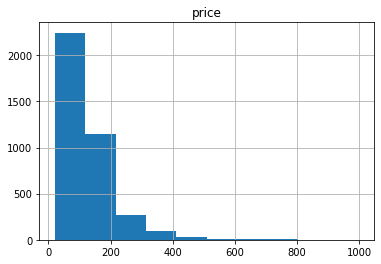

In [61]:
#3: Plot Histogram of the price 
host_list.hist(column='price')

#As per the Histogram the price data is Right skewed which means most house prices are between 100 and 200 $ and very few 
#are in range of 800 $ 

In [62]:
#Populate Host response nan with average 
host_list['host_response_rate'] = host_list['host_response_rate'].str[:-1].astype('float64')
host_list['host_response_rate'] = host_list.host_response_rate.fillna(host_list.host_response_rate.mean())

/Users/sandeepdiddi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sandeepdiddi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
host_list.host_response_rate.values

array([ 96.        ,  98.        ,  67.        , ...,  94.88679818,
       100.        , 100.        ])

In [64]:
# rename to neighbourhood_group_cleansed to neighbourhood
col = {'neighbourhood_group_cleansed': 'neighbourhood'}
host_list.rename(columns=col,inplace=True)

/Users/sandeepdiddi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Cleaning individual columns

In [65]:
# drop few records with no room information
host_list= host_list[pd.notnull(host_list['host_is_superhost'])]
host_list= host_list[pd.notnull(host_list['beds'])]
host_list= host_list[pd.notnull(host_list['bathrooms'])]
host_list= host_list[pd.notnull(host_list['bedrooms'])]
host_list= host_list[pd.notnull(host_list['property_type'])]

In [66]:
host_list.isnull().sum()

id                             0
host_id                        0
host_response_rate             0
host_is_superhost              0
neighbourhood                  0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
price                          1
guests_included                0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64

In [67]:
host_list.shape

(3793, 21)

#### Property_type
Some cleaning of property types is required as there are a large number of categories with only a few listings.

In [68]:

# remove infrequent property types
host_list = host_list[host_list.property_type.isin(['Apartment', 'House' , 'Condominium',
       'Townhouse', 'Loft', 'Bed & Breakfast'])]

cleaned_base = host_list

In [69]:
# convert categories to dummies
host_list = pd.get_dummies(host_list)

In [70]:
# Rename features with spaces in their names
host_list.rename(index=str, columns={
    'neighbourhood_Beacon Hill': 'neighbourhood_Beacon_Hill',
    'neighbourhood_Capitol Hill': 'neighbourhood_Capitol_Hill',
    'neighbourhood_Central Area': 'neighbourhood_Central_Area',
    'neighbourhood_Lake City': 'neighbourhood_Lake_City',
    'neighbourhood_Other neighborhoods': 'neighbourhood_Other_neighborhoods',
    'neighbourhood_Queen Anne': 'neighbourhood_Queen_Anne',
    'neighbourhood_Rainier Valley': 'neighbourhood_Rainier_Valley',
    'neighbourhood_Seward Park': 'neighbourhood_Seward_Park',
    'neighbourhood_University District': 'neighbourhood_University_District',
    'neighbourhood_West Seattle': 'neighbourhood_West_Seattle',
    'property_type_Bed & Breakfast': 'property_type_Bed_Breakfast',
    'room_type_Entire home/apt': 'room_type_Entire_home_apt',
    'room_type_Private room': 'room_type_Private_room',
    'room_type_Shared room': 'room_type_Shared_room'
}, inplace=True)

In [72]:
host_list.to_csv('cleaned-listings-dummies.csv', index = False)
cleaned_base.to_csv('cleaned-listings-base.csv', index = False)